In [2]:
# import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
# load dataset 
# dataset is from https://www.kaggle.com/subinium/movie-character-mbti-dataset
df = pd.read_csv('mbti.csv')

# drop unnecessary columns
# df = df.drop(columns=['stat', 'enneagram', 'img_url'])
df = df.dropna()
df = df.drop_duplicates()

In [6]:
# mbti personality types
mbti = ['INTJ', 'INTP', 'ENTJ', 'ENTP', 'INFJ', 'INFP', 'ENFJ', 'ENFP', 'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP']

# remove rows that are not an mbti
df = df[df['mbti'].isin(mbti)]

# remove trailing whitespaces
df['mbti'] = df['mbti'].str.strip()
df['role'] = df['role'].str.strip()
df['movie'] = df['movie'].str.strip()

# replace transparent image to make it visible on site
df = df.replace('https://www.personality-database.com/images/profile_transparent.png', 'https://upload.wikimedia.org/wikipedia/commons/7/7c/Profile_avatar_placeholder_large.png')

In [7]:
# create dictionary of all movies with mbti count
movie_set = set(df['movie'])

movie_dict = {}
for index, row in df.iterrows():
  if row['movie'] not in movie_dict:
    movie_dict[row['movie']] = {}
    movie_dict[row['movie']][row['mbti']] = 1
  elif row['movie'] in movie_dict:
    if row['mbti'] not in movie_dict[row['movie']]:
      movie_dict[row['movie']][row['mbti']] = 1
    elif row['mbti'] in movie_dict[row['movie']]:
      movie_dict[row['movie']][row['mbti']] += 1
# movie_dict

In [8]:
character_dict = {}
for index, row in df.iterrows():
  if row['movie'] not in character_dict:
    character_dict[row['movie']] = {}
    character_dict[row['movie']][row['mbti']] = [(row['role'], row['img_url'])]
  elif row['movie'] in character_dict:
    if row['mbti'] not in character_dict[row['movie']]:
      character_dict[row['movie']][row['mbti']] = [(row['role'], row['img_url'])]
    elif row['mbti'] in character_dict[row['movie']]:
      character_dict[row['movie']][row['mbti']] += [(row['role'], row['img_url'])]
# character_dict

In [9]:
json.dump( character_dict, open( "character_dict.json", 'w' ) )

In [10]:
# character_dict['Aquamarine (2006)']

In [11]:
# mbti keys
mbti_keys = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP', 'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']

# index to movie dictionary
# movie_index = list(movie_dict.keys())
movie_index = np.array(list(movie_dict.keys()))

In [12]:
txt = np.savetxt('movie_index.txt', movie_index, delimiter='\n', fmt = '%s')

In [13]:
x = np.loadtxt('movie_index.txt', delimiter='\n', dtype=str, comments=None)
# x = np.genfromtxt('movie_index.txt', delimiter = '\n', dtype=str)
# for i in x:
#   print(i)
# x1 = set(x)
# mi = set(movie_index)
# list(mi-x1)
# movie_index.index('#Alive')
# len(x)

In [14]:
# movie mbti matrix
movie_mbti = np.zeros((len(movie_index), len(mbti_keys)))
for idx, movie in enumerate(movie_index):
  m_dict = movie_dict[movie]
  for mbti in m_dict:
    index = mbti_keys.index(mbti)
    movie_mbti[idx][index] = m_dict[mbti]
# movie_dict

In [15]:
# normalize matrix
movie_mbti_norm = np.zeros(len(movie_index))

movie_mbti_norm = np.linalg.norm(movie_mbti, axis = 1)
movie_mbti_norm

updated_movie = movie_mbti/ (movie_mbti_norm[:,None])
# updated_movie

In [16]:
np.savetxt('updated_movie.txt', updated_movie)

In [18]:
# np.loadtxt('updated_movie.txt')

In [20]:
# example output of mbti
q = [(0.038709241754524996, 'ESTJ'), (0.007330047906707925, 'ENFJ'), (0.00466608015731746, 'ENFP'), (0.004379393029007701, 'ENTP'), (0.0035262257074234644, 'INFP'), (0.002650094243194404, 'INTP'), (0.002475537137355251, 'INFJ'), (0.0020785052887799245, 'INTJ')]


query = np.zeros(len(mbti_keys))
for (score, mbti) in q:
  query[mbti_keys.index(mbti)] = score

In [22]:
# get ranked indices
movie_score = np.dot(updated_movie, query)
ranking_index = np.argsort((movie_score * -1))
# ranking_index

In [25]:
# get ranked list of movies
ranking_index = ranking_index[:5]
movie_list = []
for i in ranking_index:
  movie_list.append(movie_index[i])
# movie_list

<BarContainer object of 6 artists>

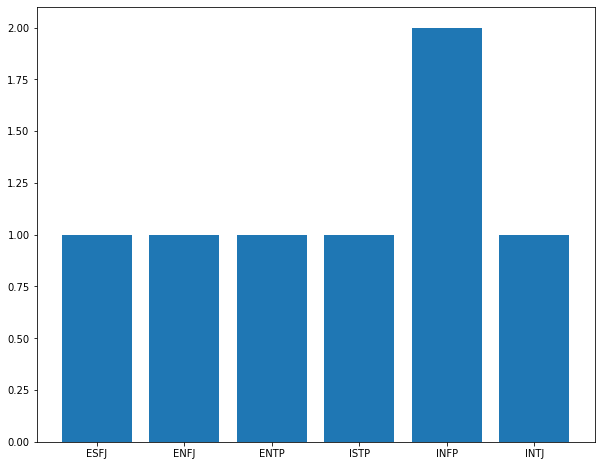

In [26]:
# plot histogram of movie '10 Things I Hate About You (1999)'
m1 = movie_dict['10 Things I Hate About You (1999)']
plt.figure(figsize = (10, 8))
plt.bar(list(m1.keys()), m1.values())

<BarContainer object of 16 artists>

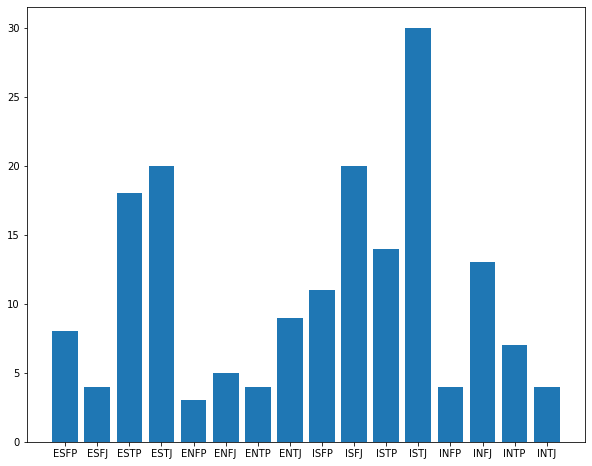

In [27]:
# plot histogram of movie 'Star Wars'
m1 = movie_dict['Star Wars']
plt.figure(figsize = (10, 8))
plt.bar(list(m1.keys()), m1.values())